# Predicting gene knockout strategies

In [1]:
from cobra.io import read_sbml_model
from cameo import phenotypic_phase_plane
import matplotlib.pyplot as plt


In [2]:
model = read_sbml_model('data/e_coli_core.xml.gz')

In [3]:
model.reactions.EX_o2_e.lower_bound = 0

In [4]:
model.reactions.EX_succ_e

Reaction identifier,EX_succ_e
Name,Succinate exchange
Memory address,0x7f5e4f3e8640
Stoichiometry,succ_e --> Succinate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


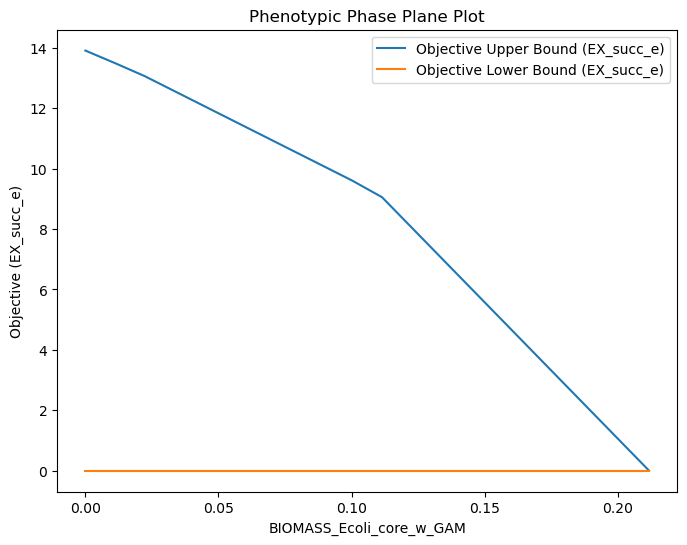

In [6]:
ppp = phenotypic_phase_plane(model,
                             variables=[model.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=model.reactions.EX_succ_e)

df = ppp.data_frame

# Plot BIOMASS vs Objective (EX_succ_e)
plt.figure(figsize=(8, 6))
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_upper_bound'], label='Objective Upper Bound (EX_succ_e)')
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_lower_bound'], label='Objective Lower Bound (EX_succ_e)')
plt.xlabel('BIOMASS_Ecoli_core_w_GAM')
plt.ylabel('Objective (EX_succ_e)')
plt.title('Phenotypic Phase Plane Plot')
plt.legend()
plt.show()

In [7]:
mutant1 = model.copy()

In [8]:
mutant1.reactions.ACKr.knock_out()
mutant1.reactions.ATPS4r.knock_out()
mutant1.reactions.ATPM.knock_out()
mutant1.reactions.FUM.knock_out()

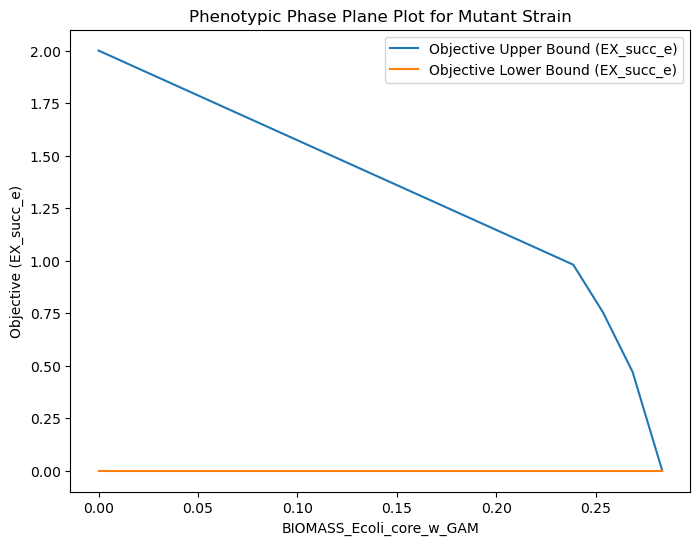

In [10]:
# Perform phenotypic phase plane analysis on the mutant
ppp = phenotypic_phase_plane(mutant1,
                             variables=[mutant1.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant1.reactions.EX_succ_e)

# Extract the data from the result
df = ppp.data_frame

# Plot BIOMASS vs Objective (EX_succ_e)
plt.figure(figsize=(8, 6))
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_upper_bound'], label='Objective Upper Bound (EX_succ_e)')
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_lower_bound'], label='Objective Lower Bound (EX_succ_e)')
plt.xlabel('BIOMASS_Ecoli_core_w_GAM')
plt.ylabel('Objective (EX_succ_e)')
plt.title('Phenotypic Phase Plane Plot for Mutant Strain')
plt.legend()
plt.show()

In [11]:
mutant2 = model.copy()

In [12]:
mutant2.reactions.ACALD.knock_out()
mutant2.reactions.PYK.knock_out()
mutant2.reactions.ME2.knock_out()

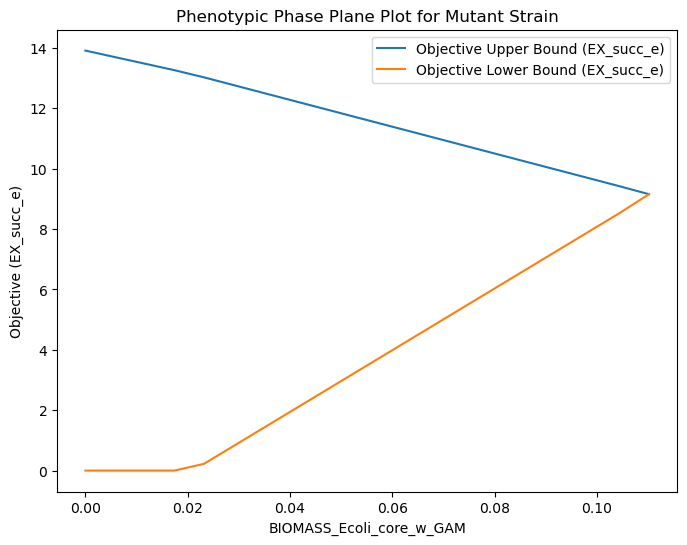

In [13]:
ppp = phenotypic_phase_plane(mutant2,
                             variables=[mutant2.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant2.reactions.EX_succ_e)

# Extract the data from the result
df = ppp.data_frame

# Plot BIOMASS vs Objective (EX_succ_e)
plt.figure(figsize=(8, 6))
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_upper_bound'], label='Objective Upper Bound (EX_succ_e)')
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_lower_bound'], label='Objective Lower Bound (EX_succ_e)')
plt.xlabel('BIOMASS_Ecoli_core_w_GAM')
plt.ylabel('Objective (EX_succ_e)')
plt.title('Phenotypic Phase Plane Plot for Mutant Strain')
plt.legend()
plt.show()

In [14]:
mutant3 = model.copy()

In [15]:
mutant3.reactions.ACALD.knock_out()
mutant3.reactions.LDH_D.knock_out()

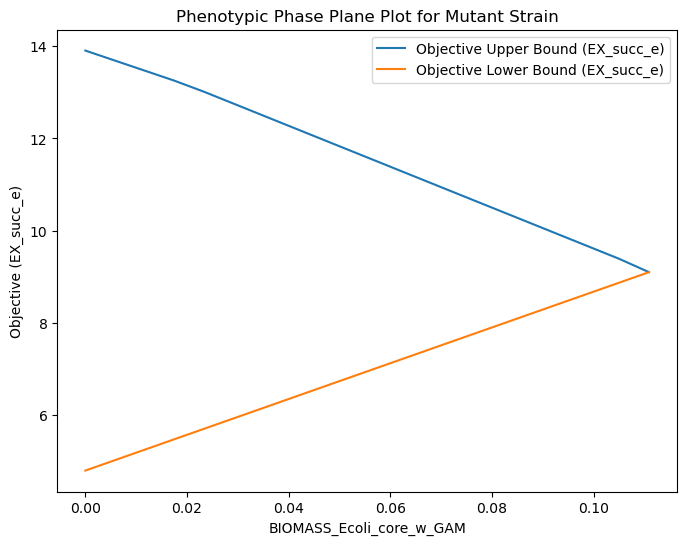

In [17]:
ppp = phenotypic_phase_plane(mutant3,
                             variables=[mutant3.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant3.reactions.EX_succ_e)

# Extract the data from the result
df = ppp.data_frame

# Plot BIOMASS vs Objective (EX_succ_e)
plt.figure(figsize=(8, 6))
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_upper_bound'], label='Objective Upper Bound (EX_succ_e)')
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_lower_bound'], label='Objective Lower Bound (EX_succ_e)')
plt.xlabel('BIOMASS_Ecoli_core_w_GAM')
plt.ylabel('Objective (EX_succ_e)')
plt.title('Phenotypic Phase Plane Plot for Mutant Strain')
plt.legend()
plt.show()

We can also knock-out genes instead, and implicitly block the reactions that are annotated to only occur in presence of the corresponding gene. To reproduce the ACALD, LDH_D knock-out above with genes instead we can do:

In [18]:
mutant4 = model.copy()

In [19]:
to_knock = mutant4.reactions.ACALD.genes.union(mutant4.reactions.LDH_D.genes)
for gene in to_knock:
    gene.knock_out()

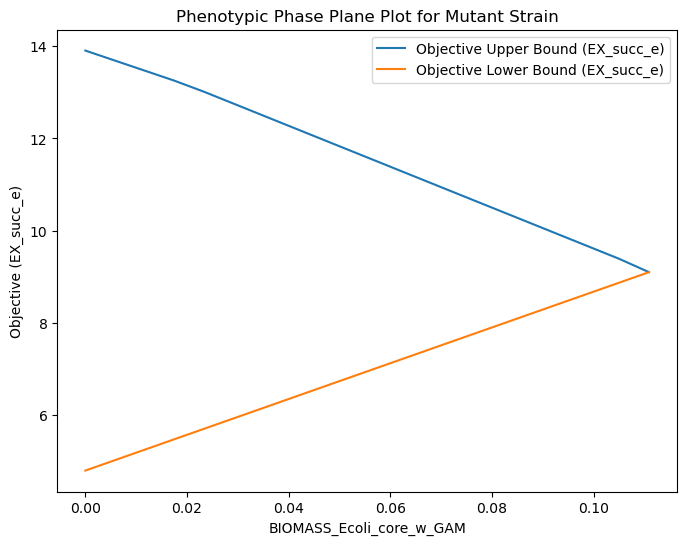

In [20]:
ppp = phenotypic_phase_plane(mutant4,
                             variables=[mutant4.reactions.BIOMASS_Ecoli_core_w_GAM],
                             objective=mutant4.reactions.EX_succ_e)

# Extract the data from the result
df = ppp.data_frame

# Plot BIOMASS vs Objective (EX_succ_e)
plt.figure(figsize=(8, 6))
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_upper_bound'], label='Objective Upper Bound (EX_succ_e)')
plt.plot(df['BIOMASS_Ecoli_core_w_GAM'], df['objective_lower_bound'], label='Objective Lower Bound (EX_succ_e)')
plt.xlabel('BIOMASS_Ecoli_core_w_GAM')
plt.ylabel('Objective (EX_succ_e)')
plt.title('Phenotypic Phase Plane Plot for Mutant Strain')
plt.legend()
plt.show()

## Excercises

* Do any of these desigs work under aerobic conditions?
* Did the gene-knockout design above have any unintended effects?

## Solutions

### Solution 1

### Solution 2

# Predict gene knockout strategies

In cameo we have two ways of predicting gene knockout targets: using evolutionary algorithms (OptGene) or linear programming (OptKnock)

## OptGene

OptGene is an approach to search for gene or reaction knockouts that relies on evolutionary algorithms[1]. The following image from authors summarizes the OptGene workflow.

<img src="http://static-content.springer.com/image/art%3A10.1186%2F1471-2105-6-308/MediaObjects/12859_2005_Article_632_Fig1_HTML.jpg"/>

In [24]:
from cameo.strain_design.heuristic.evolutionary_based import OptGene

ImportError: cannot import name 'find_gene_knockout_reactions' from 'cobra.manipulation.delete' (/opt/conda/envs/gems/lib/python3.8/site-packages/cobra/manipulation/delete.py)

In [23]:
import cameo

print(cameo.__version__)


0.13.6


In [ ]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/e_coli_core.xml.gz')

In [ ]:
optgene = OptGene(model)

In [ ]:
result = optgene.run(target=model.reactions.EX_succ_e, 
                     biomass=model.reactions.BIOMASS_Ecoli_core_w_GAM,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=20000, population_size=200, max_knockouts=5,
                     plot=False, growth_coupled=True)

In [ ]:
result

<div class="alert alert-warning">
The optimization above proposes to knock out ATPS4r (ATP synthase) and `s0001` (an spontaneous reaction) which probably isn't a good strategy.
</div>

<div class="alert alert-success">
Workaround: Use the `essential_genes` parameter to `OptGene` to create an exclude list.
</div>

In [ ]:
essential = [g.id for g in model.reactions.ATPS4r.genes] + ['s0001']
optgene = OptGene(model, essential_genes=essential)
result = optgene.run(target=model.reactions.EX_succ_e, 
                     biomass=model.reactions.BIOMASS_Ecoli_core_w_GAM,
                     substrate=model.metabolites.glc__D_e,
                     max_evaluations=20000, population_size=200, max_knockouts=5,
                     plot=False, growth_coupled=True)
result

In [ ]:
result.plot(0)

In [ ]:


result.display_on_map(0, "e_coli_core.Core metabolism")

## OptKnock

OptKnock uses a bi-level mixed integer linear programming approach to identify reaction knockouts[2]:

$$
\begin{matrix}
maximize & \mathit{v_{chemical}} & & (\mathbf{OptKnock}) \\
\mathit{y_j} & & & \\
subject~to & maximize & \mathit{v_{biomass}} & (\mathbf{Primal}) \\
& \mathit{v_j} & & & & \\
\end{matrix}\\
\begin{bmatrix}
subject~to  & \sum_{j=1}^{M}S_{ij}v_{j} = 0,\\ 
& v_{carbon\_uptake} = v_{carbon~target}\\ 
& v_{apt} \ge v_{apt\_main}\\ 
& v_{biomass} \ge v_{target\_biomass}\\ 
& v_{j}^{min} \cdot y_j \le v_j \le v_{j}^{max} \cdot y_j, \forall j \in \boldsymbol{M} \\
\end{bmatrix}\\
\begin{align}
 & y_j = {0, 1}, & & \forall j \in \boldsymbol{M} & \\
 & \sum_{j \in M} (1 - y_j) \le K& & & \\
\end{align}
$$



In [ ]:
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [ ]:
optknock = OptKnock(model, fraction_of_optimum=0.1, exclude_reactions=['ATPS4r', 'CO2t', 'H2Ot'])

Again, we include a couple of reactions on the exclude list to avoid uninteresting solution. Running multiple knockouts with OptKnock can take a few hours or days...

In [ ]:
result = optknock.run(max_knockouts=3, target="EX_ac_e", biomass="BIOMASS_Ecoli_core_w_GAM")

In [ ]:
result

In [ ]:
result.plot(0)

In [ ]:
result.display_on_map(0, "e_coli_core.Core metabolism")

## References

[1]Patil, K. R., Rocha, I., Förster, J., & Nielsen, J. (2005). Evolutionary programming as a platform for in silico metabolic engineering. BMC Bioinformatics, 6, 308. doi:10.1186/1471-2105-6-308

[2]Burgard, A.P., Pharkya, P., Maranas, C.D. (2003), "OptKnock: A Bilevel Programming Framework for Identifying Gene Knockout Strategies for Microbial Strain Optimization," Biotechnology and Bioengineering, 84(6), 647-657.

## Exercises

* Use OptGene or OptKnock to find a growth coupled design for a product of your choice!